In [71]:
#Yueyang Shen EECS 476 Winter 2020
#Input: Input: Chemical and Disease dataset
#Output: Plots: Louvain Algorithm with Tanimoto Coefficient cutoff 0.5/0.7
#        Exf files: test.gexf(cutoff 0.5) test7.gexf(cutoff 0.7)


#store the none-repeating drugs that are associated to COVID-19
index_arr = []
index = 0
num_covid = 0
drug_row = []
chemical = []
chemical_dictionary  = {}
id_dictionary = {}
with open('CTD_chemicals_diseases.csv', 'r', encoding='utf-8') as f:
    for line in f:
        index += 1
        line_arr = line.split(',')
        quotation_arr = line.split('"')
        if len(quotation_arr) == 1:
            if(line_arr[3] == "COVID-19"):
                num_covid += 1
                index_arr.append(index)
                size_arr = len(index_arr)
                if index_arr[size_arr-1]-index_arr[size_arr-2]!=1:
                    drug_row.append(line)
                    chemical.append(line_arr[0].strip('"'))
                    chemical_dictionary[line_arr[0].strip('"')] = line_arr[1]
                    
                    id_dictionary[line_arr[1]] = line_arr[0].strip('"')
        else:
            line_arr = quotation_arr[2].split(',')
            #print(line_arr[2])
            if(line_arr[3] == "COVID-19"):
                num_covid += 1
                index_arr.append(index)
                size_arr = len(index_arr)
                if index_arr[size_arr-1]-index_arr[size_arr-2]!=1:
                    drug_row.append(line)
                    chemical.append(quotation_arr[1])
                    chemical_dictionary[quotation_arr[1].strip('"')] = line_arr[1]
                    id_dictionary[line_arr[1]] = quotation_arr[1].strip('"')
    f.close()
#the number of candidate drug
print("Number of unqiue chemicals related to COVID-19",len(drug_row))
print("Number of associations",index)
print("The number of COVID entries", num_covid)

Number of unqiue chemicals related to COVID-19 640
Number of associations 1048547
The number of COVID entries 1579


In [72]:
#import the libraries necessary for chemical-chemical interaction

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import RDConfig
import os
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import PyMol
import cirpy
import numpy as np
print(chemical)


['10-nitro-oleic acid', '1,12-benzoperylene', '1-(1-acetyl-piperidine-4-yl)-3-adamantan-1-yl-urea', "1,1-bis(3'-indolyl)-1-(4-chlorophenyl)methane", "1,1-bis(3'-indolyl)-1-(4-trifluoromethylphenyl)methane", '11-dehydrocorticosterone', '11-deoxyprostaglandin E1', '1,1-dimethylbutyl-1-deoxy-Delta(9)-THC', '11-hydroxyandrostenedione', '1-((1-O-octadecyl-2-O-methylglycero)phospho)-3-deoxy-myo-inositol', '1-(2-((1-(4-amino-3-chlorophenyl)methanoyl)amino)-3,3-dimethylbutanoyl)pyrrolidine-2-carboxylic acid', '1-(2-(1-adamantyl)ethyl)-1-pentyl-3-(3-(4-pyridyl)propyl)urea', '1,2,3,4-tetrahydroisoquinoline', '12-(3-adamantan-1-ylureido)dodecanoic acid', '1,2,3-trichloropropane', '1,24-dihydroxyvitamin D2', '1,25-dihydroxyvitamin D', '12-acetoxyhawtriwaic acid lactone', "1,2-bis(2-aminophenoxy)ethane-N,N,N',N'-tetraacetic acid", "1,2-bis(2-aminophenoxy)ethane N,N,N',N'-tetraacetic acid acetoxymethyl ester", '1-(2-bromophenyl)-3-(7-cyano-3H-benzotriazol-4-yl)urea', '1-(2-cyano-3,12-dioxooleana-1,9

In [73]:
#create a drug-drug similarity matrix
d_d_similarity = np.zeros((len(drug_row),len(drug_row)))

Fingerprint_arr = []
valid_smiles = np.ones(len(drug_row))
print("Chemicals that are not included in the upcoming similarity matrix:")
for i in range(len(drug_row)):
    #convert the chemical to smiles
    smiles1 = cirpy.resolve(chemical[i], 'smiles')
    if smiles1 != None:
        #convert to chemical fingerprint
        Fingerp = FingerprintMols.FingerprintMol(Chem.MolFromSmiles(smiles1))
        Fingerprint_arr.append(Fingerp)
    else:
        print(chemical[i])
        Fingerprint_arr.append('Nothing')
        valid_smiles[i] = 0

for i in range(len(drug_row)):
    for j in range(i,len(drug_row)):
        if valid_smiles[i]*valid_smiles[j]!=0:
            d_d_similarity[i,j] = DataStructs.FingerprintSimilarity(Fingerprint_arr[i],Fingerprint_arr[j],metric=DataStructs.TanimotoSimilarity)
            d_d_similarity[j,i] = d_d_similarity[i,j]
print("The similarity",d_d_similarity)       

Chemicals that are not included in the upcoming similarity matrix:
1,1-bis(3'-indolyl)-1-(4-chlorophenyl)methane
1,1-bis(3'-indolyl)-1-(4-trifluoromethylphenyl)methane
1,1-dimethylbutyl-1-deoxy-Delta(9)-THC
1-((1-O-octadecyl-2-O-methylglycero)phospho)-3-deoxy-myo-inositol
12-acetoxyhawtriwaic acid lactone
1-(2-cyano-3,12-dioxooleana-1,9-dien-28-oyl) imidazole
12-dehydrogingerdione
1,3-bis(4-hydroxyphenyl)-4-methyl-5-(4-(2-piperidinylethoxy)phenol)-1H-pyrazole
1',3'-dihydro-1'-ethanol-3',3'-dimethyl-8-methoxy-6-nitro-spiro(2H-1-benzopyran-2,2'-(2H)-indole)
1-(4-hydroxyiminomethylpyridinium)-4-(4-carbamoylpyridinium)butane
15,16-dihydrotanshinone I
15-deoxyprostaglandin J2
15-Hydroxy-11 alpha,9 alpha-(epoxymethano)prosta-5,13-dienoic Acid
16-(4-fluorophenoxy)lipoxin A4
17 alpha-Hydroxyprogesterone Caproate
17-(dimethylaminoethylamino)-17-demethoxygeldanamycin
1 alpha,24-dihydroxyvitamin D3
1-dodecylsulfonyl-5N,6O-oxomethylidenenojirimycin
1-hydroxy-1-norresistomycin
1-hydroxy-2-oxo-3,3-b

In [74]:
#print out the top 10 drugs that have the highest value of row_sum
row_sum = np.sum(d_d_similarity,axis=1)
for i in range(10):
    index = np.argmax(row_sum)
    print("The",i,"th drug is",chemical[index],"with total similarity",row_sum[index] )
    row_sum[index] = 0


The 0 th drug is 4-vinylpyridine with total similarity 234.40181811999548
The 1 th drug is 4,4'-diphenylmethane diisocyanate with total similarity 233.08043481762317
The 2 th drug is 4-oxo-2-nonenal with total similarity 229.2263761338736
The 3 th drug is 3-Mercaptopropionic Acid with total similarity 228.33553646195838
The 4 th drug is acetic anhydride with total similarity 226.41274722880917
The 5 th drug is 1-Naphthylisothiocyanate with total similarity 225.9522726130029
The 6 th drug is 5,8,11,14-Eicosatetraynoic Acid with total similarity 225.0261233092641
The 7 th drug is 4-methylbenzaldehyde with total similarity 224.71664299986182
The 8 th drug is Acetaminophen with total similarity 222.93970585612965
The 9 th drug is alpha-naphthyl isocyanate with total similarity 222.70339819716463


In [75]:
#0.7 cutting threshold
d_d_similarity1 = d_d_similarity

#print out the top 10 drugs that have the highest value of row_sum
row_sum = np.sum(d_d_similarity,axis=1)
for i in range(10):
    index = np.argmax(row_sum)
    print("The",i,"th drug is",chemical[index],"with total similarity",row_sum[index] )
    row_sum[index] = 0




The 0 th drug is 4-vinylpyridine with total similarity 234.40181811999548
The 1 th drug is 4,4'-diphenylmethane diisocyanate with total similarity 233.08043481762317
The 2 th drug is 4-oxo-2-nonenal with total similarity 229.2263761338736
The 3 th drug is 3-Mercaptopropionic Acid with total similarity 228.33553646195838
The 4 th drug is acetic anhydride with total similarity 226.41274722880917
The 5 th drug is 1-Naphthylisothiocyanate with total similarity 225.9522726130029
The 6 th drug is 5,8,11,14-Eicosatetraynoic Acid with total similarity 225.0261233092641
The 7 th drug is 4-methylbenzaldehyde with total similarity 224.71664299986182
The 8 th drug is Acetaminophen with total similarity 222.93970585612965
The 9 th drug is alpha-naphthyl isocyanate with total similarity 222.70339819716463


In [76]:
#cleaning out the unavailable chemicals 

valid_drug = []
indexing_map = []
for i in range(len(drug_row)):
    if Fingerprint_arr[i]!="Nothing":
        valid_drug.append(chemical[i])
        indexing_map.append(i)
new_similarity = np.zeros((len(valid_drug),len(valid_drug)))
print("Number of valid chemicals",len(valid_drug))
for i in range(len(indexing_map)):
    for j in range(i,len(indexing_map)):
        new_similarity[i,j] = d_d_similarity[indexing_map[i],indexing_map[j]]
        new_similarity[j,i] = d_d_similarity[indexing_map[i],indexing_map[j]]

Number of valid chemicals 515


In [77]:
print(len(valid_drug))
#importing graphing scheme
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm

515


In [78]:
print(new_similarity)



[[1.         0.35344828 0.2776204  ... 0.38028169 0.34482759 0.39901478]
 [0.35344828 1.         0.3553719  ... 0.35433071 0.97777778 0.49450549]
 [0.2776204  0.3553719  1.         ... 0.46621622 0.34710744 0.38116592]
 ...
 [0.38028169 0.35433071 0.46621622 ... 1.         0.34645669 0.46184739]
 [0.34482759 0.97777778 0.34710744 ... 0.34645669 1.         0.48351648]
 [0.39901478 0.49450549 0.38116592 ... 0.46184739 0.48351648 1.        ]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Colors [[5.00000000e-01 0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [3.50980392e-01 2.31947641e-01 9.93158666e-01 1.00000000e+00]
 [1.94117647e-01 4.62203884e-01 9.71281032e-01 1.00000000e+00]
 [3.72549020e-02 6.64540179e-01 9.34679767e-01 1.00000000e+00]
 [1.11764706e-01 8.19740483e-01 8.86773686e-01 1.00000000e+00]
 [2.68627451e-01 9.34679767e-01 8.23252948e-01 1.00000000e+00]
 [4.25490196e-01 9.93158666e-01 7.47252535e-01 1.00000000e+00]
 [5.74509804e-01 9.93158666e-01 6.64540179e-01 1.00000000e+00]
 [7.31372549e-01 9.34679767e-01 5.67674716e-01 1.00000000e+00]
 [8.88235294e-01 8.19740483e-01 4.62203884e-01 1.00000000e+00]
 [1.00000000e+00 6.64540179e-01 3.55490833e-01 1.00000000e+00]
 [1.00000000e+00 4.62203884e-01 2.37935195e-01 1.00000000e+00]
 [1.00000000e+00 2.31947641e-01 1.16772702e-01 1.00000000e+00]
 [1.00000000e+00 1.22464680e-16 6.12323400e-17 1.00000000e+00]]
Number of clusters 59.0


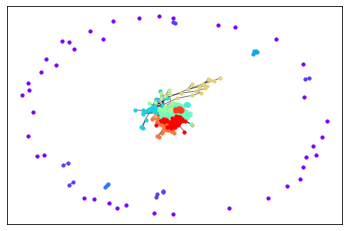

In [79]:
#reinitialize Louvain algorithm with cut off at 0.5
#test.gexf is generated for plotting in gephi

valid_drug = []
indexing_map = []
for i in range(len(drug_row)):
    if Fingerprint_arr[i]!="Nothing":
        valid_drug.append(chemical[i])
        indexing_map.append(i)
new_similarity = np.zeros((len(valid_drug),len(valid_drug)))
#print(len(valid_drug))
for i in range(len(indexing_map)):
    for j in range(i,len(indexing_map)):
        new_similarity[i,j] = d_d_similarity[indexing_map[i],indexing_map[j]]
        new_similarity[j,i] = d_d_similarity[indexing_map[i],indexing_map[j]]




#visualizing the network
G = nx.Graph()

for i in range(len(valid_drug)):
    G.add_node(valid_drug[i])
for i in range(len(valid_drug)):
    for j in range(i,len(valid_drug)):
        if new_similarity[i,j]>0.5:
            G.add_edge(valid_drug[i],valid_drug[j])

#apply louvain algorithm to detect communities
import community as community_louvain
partition = community_louvain.best_partition(G)
#print(partition)
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
#colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
#m for purple
#number of cluster number
color_set = set()
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    color_set.add(len(list_nodes))
#draw a rainbow
colors = cm.rainbow(np.linspace(0, 1, len(color_set)))
color_list = list(color_set)
print("Colors",colors)
#with outliers
'''
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    
    if len(list_nodes)<6:
        nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 3,node_color = colors[len(list_nodes)])
    elif len(list_nodes)<12:
        nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 3,node_color = colors[5])
    else:
        nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 3,node_color = colors[6])
        print(list_nodes)
'''
    #without outliers
count = 0.
cluster_list = []
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    cluster_list.append(list_nodes)
    for i in range(len(color_list)):
        if(color_list[i]==len(list_nodes)) :
            nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 10,node_color = colors[i])
print("Number of clusters",count)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()
nx.write_gexf(G, "test.gexf")


Cluster Mapping: {'10-nitro-oleic acid': 0, '1,12-benzoperylene': 1, '1-(1-acetyl-piperidine-4-yl)-3-adamantan-1-yl-urea': 2, '11-dehydrocorticosterone': 3, '11-deoxyprostaglandin E1': 4, '11-hydroxyandrostenedione': 3, '1-(2-((1-(4-amino-3-chlorophenyl)methanoyl)amino)-3,3-dimethylbutanoyl)pyrrolidine-2-carboxylic acid': 5, '1-(2-(1-adamantyl)ethyl)-1-pentyl-3-(3-(4-pyridyl)propyl)urea': 6, '1,2,3,4-tetrahydroisoquinoline': 7, '12-(3-adamantan-1-ylureido)dodecanoic acid': 2, '1,2,3-trichloropropane': 8, '1,24-dihydroxyvitamin D2': 3, '1,25-dihydroxyvitamin D': 3, "1,2-bis(2-aminophenoxy)ethane-N,N,N',N'-tetraacetic acid": 9, "1,2-bis(2-aminophenoxy)ethane N,N,N',N'-tetraacetic acid acetoxymethyl ester": 9, '1-(2-bromophenyl)-3-(7-cyano-3H-benzotriazol-4-yl)urea': 10, '1,2-diamino-4-nitrobenzene': 11, '1,2-dibromo-4-(1,2-dibromoethyl)cyclohexane': 12, '1,2-Dihydroxybenzene-3,5-Disulfonic Acid Disodium Salt': 13, '1,2-Dimethylhydrazine': 14, '1,2-dioleoyloxy-3-(trimethylammonium)propane

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

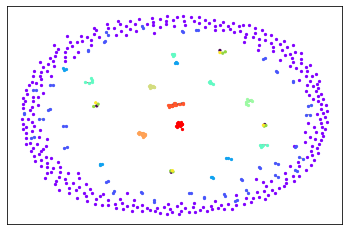

In [80]:
#Tanimoto coefficient 0.7 cutoff Louvain algorithm initialization
# test7.gexf is generated for further plotting in gephi
G1 = nx.Graph()

for i in range(len(valid_drug)):
    G1.add_node(valid_drug[i])
for i in range(len(valid_drug)):
    for j in range(i,len(valid_drug)):
        if new_similarity[i,j]>0.7:
            G1.add_edge(valid_drug[i],valid_drug[j])
#apply louvain algorithm to detect communities
import community as community_louvain
partition = community_louvain.best_partition(G1)
print("Cluster Mapping:",partition)
size = float(len(set(partition.values())))
pos = nx.spring_layout(G1)
count = 0.
#colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
#m for purple
#number of cluster number
color_set = set()
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    color_set.add(len(list_nodes))
#draw a rainbow
colors = cm.rainbow(np.linspace(0, 1, len(color_set)))
#the size of the colorset
print("Cluster size",color_set)
color_list = list(color_set)
count = 0.
cluster_list = []
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    cluster_list.append(list_nodes)
    for i in range(len(color_list)):
        if(color_list[i]==len(list_nodes)):
            nx.draw_networkx_nodes(G1, pos, list_nodes, node_size = 5,node_color = colors[i])
            #plot the drug cluster
            if len(list_nodes)==18:
                list_n = list_nodes
                Mol_V = [Chem.MolFromSmiles(cirpy.resolve(x, 'smiles')) for x in list_nodes]
                img=Draw.MolsToGridImage(Mol_V[:18],molsPerRow=6,subImgSize=(200,200),legends=list_nodes)    
print("Number of clusters",count)
nx.draw_networkx_edges(G1, pos, alpha=0.5)
plt.show()
nx.write_gexf(G1, "test7.gexf")


In [81]:
#output cluster with id
#Preparing data for Q3
with open("lxys_turn.csv", mode='w') as output:
    for i in range(len(cluster_list)):
        for j in range(len(cluster_list[i])):
            str_file = str(chemical_dictionary[cluster_list[i][j]]+','+str(i))    
            output.write(str_file+'\n')

['2-(4-...adenosine', "3'-O-...-triphosphate", '4,5-dimethoxy-2-nitrobenzyl-8-bromo-cAMP', "5'-methylthioadenosine", '8-Bromo Cyclic Adenosine Monophosphate', '8-bromocyclic GMP', '8-bromo...phorothioate', "8-chloro-2'-deoxyguanosine", '8-chlorodeoxyadenosine', '8-chloroguanosine', "8-Hydroxy-2'-Deoxyguanosine", 'Acetyl Coenzyme A', 'Adenosine', "adenosine-3'...phosphorothioate", "Adenosine-5'-(N-ethylcarboxamide)", 'adenosine ...triphosphate)', 'Adenosine Diphosphate', 'Adenosine Triphosphate']


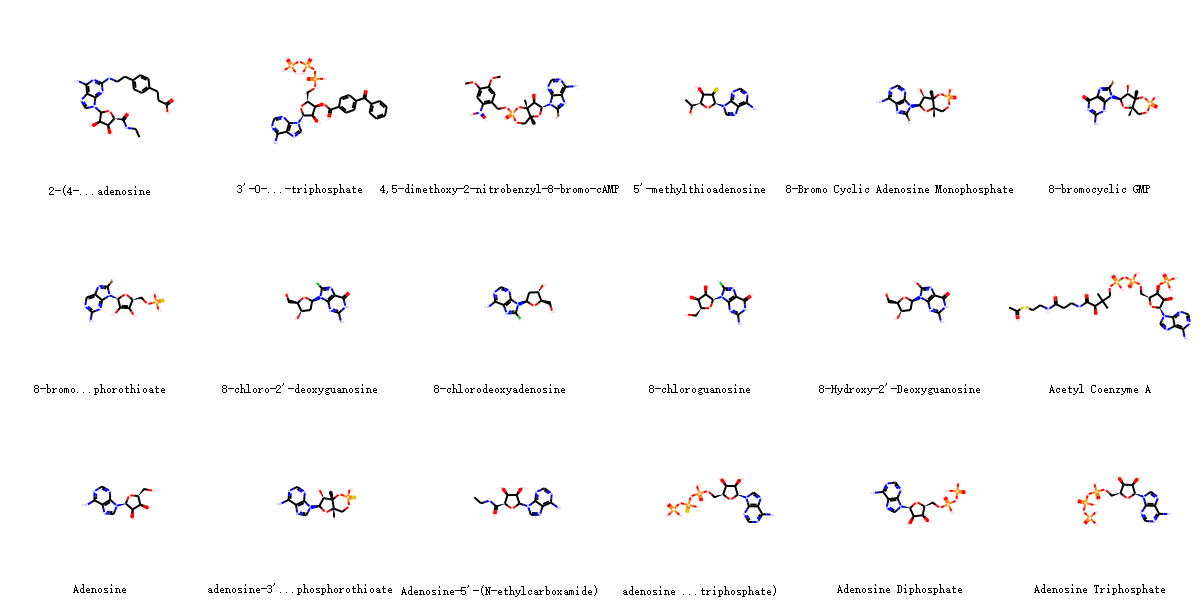

In [82]:
# plot the largest drug cluster (unable to include in the final report)
# The adenosine family drug cluster
list_t  =["2-(4-...adenosine", "3'-O-...-triphosphate", '4,5-dimethoxy-2-nitrobenzyl-8-bromo-cAMP', "5'-methylthioadenosine", '8-Bromo Cyclic Adenosine Monophosphate', '8-bromocyclic GMP', "8-bromo...phorothioate", "8-chloro-2'-deoxyguanosine", '8-chlorodeoxyadenosine', '8-chloroguanosine', "8-Hydroxy-2'-Deoxyguanosine", 'Acetyl Coenzyme A', 'Adenosine', "adenosine-3'...phosphorothioate", "Adenosine-5'-(N-ethylcarboxamide)", "adenosine ...triphosphate)", 'Adenosine Diphosphate', 'Adenosine Triphosphate']
Mol_V = [Chem.MolFromSmiles(cirpy.resolve(x, 'smiles')) for x in list_n]
img=Draw.MolsToGridImage(Mol_V[:18],molsPerRow=6,subImgSize=(200,200),legends=list_t) 
print(list_t)
img

['aluminum ammonium sulfate', 'aluminum sulfate', 'Ammonium Sulfate']


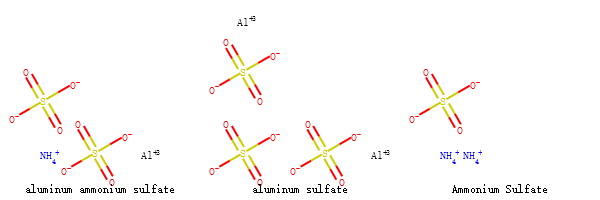

In [83]:
# The aluminum family
list_t  =["aluminum ammonium sulfate","aluminum sulfate","Ammonium Sulfate"]
Mol_V = [Chem.MolFromSmiles(cirpy.resolve(x, 'smiles')) for x in list_t]
img=Draw.MolsToGridImage(Mol_V[:3],molsPerRow=3,subImgSize=(200,200),legends=list_t) 
print(list_t)
img

In [84]:
#Preparing the data for Q3
index = 0
id = str()
with open('lxys_turn1.csv', 'r', encoding='utf-8') as f:
    for line in f:
        line_ar = line.split(",")
        if int(line_ar[1])==0 or int(line_ar[1])==1 or int(line_ar[1])==2 or int(line_ar[1])==3 or int(line_ar[1])==4 or int(line_ar[1])==5 or int(line_ar[1])==7 or int(line_ar[1])==9 or int(line_ar[1])==32:
            id += id_dictionary[line_ar[0]]  
            id += ","
            index += 1
    
    f.close()
with open("appendix.txt",'w',encoding='utf-8') as f:
    f.write(id)
    f.close()
print(index)

283
